# Datamæssige sammenhænge

Når vi arbejder med datamæssige sammenhænge undersøger vi potentielle sammenhænge i vores indsamlet data. Oftest, når vi arbejder med data på den måde, så har vi forud for dataindsamlingen en hypotese for, hvilke sammenhænge vi vil se. Eksempelvis, hvis vi gik ud og spurgte rige personer, hvilken bil de kører rundt i, så har vi en forventning om, at det vil være dyre biler. Ind i mellem kan der godt være nogle, der ikke følger den forventning, men i det større perspektiv, så vil data over indkomst og bilens værdi nok vise, at der er en sammenhæng.

## Scatterplot

For at komme et skridt nærmere på at forstå, om vores data udviser en form for tendens, kan vi plotte vores datapunkter mod hinanden. Det gør vi i et såkaldt *scatterplot*. Lad os vise dette med et eksempel.

````{prf:eksempel} 
:label: hoejde-og-skostoerrelse-scatter

Vi får til opgave at undersøge, om der er en sammenhæng mellem højder og skostørrelser på elever i en klasse på et gymnasium. Vi indsamler følgende data

| Højde i cm | Skostørrelse |
| ---------- | ------------ |
| 182.3      | 43           |
| 184.4      | 44           |
| 168.1      | 39           |
| 165.4      | 37           |
| 164.7      | 37           |
| 172.1      | 40           |
| 191.4      | 46           |
| 197.8      | 46           |
| 187.9      | 44           |
| 182.1      | 42           |
| 182.6      | 43           |
| 188.2      | 44           |
| 190.0      | 45           |
| 181.7      | 42           |
| 169.4      | 39           |

Vi lader nu Højde i cm være variablen langs $x$-aksen og Skostørrelse være variablen langs $y$-aksen.

```{glue:figure} scatter
```

Af scatterplottet bliver det tydeligt, at der er en tendens: Elever, der er højere, bruger også større sko.

````

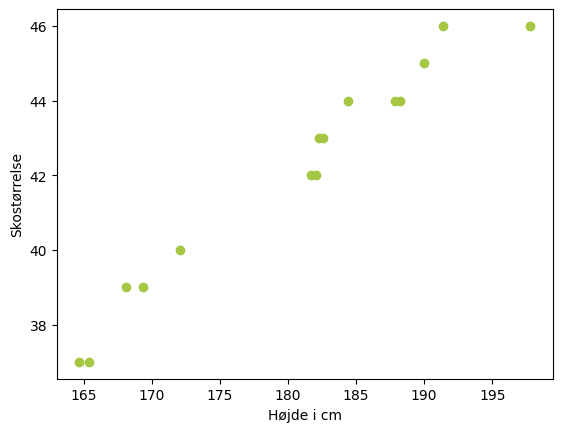

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
from myst_nb import glue

df = pd.DataFrame({
    'Højde i cm': [182.3,184.4,168.1,165.4,164.7,172.1,191.4,197.8,187.9,182.1,182.6,188.2,190.0,181.7,169.4],
    'Skostørrelse': [43,44,39,37,37,40,46,46,44,42,43,44,45,42,39]
})

# Table


# Scatter plot
fig, ax = plt.subplots()
ax.scatter(x=df['Højde i cm'],y=df['Skostørrelse'], color='#a5c743')
ax.set_xlabel('Højde i cm')
ax.set_ylabel('Skostørrelse')

glue('scatter', fig, display=False)

{prf:ref}`hoejde-og-skostoerrelse-scatter` er et eksempel på, hvor vi har et datasæt på formen $(x_1,y_1),(x_2,y_2),\dots,(x_n,y_n)$, hvor $n$ angiver antallet af observationer. Hver række i tabellen angiver et datapar $(x,y)$. For et sådan datasæt giver scatterplottet en let og intuitiv måde at se, om der er sammenhæng mellem vores to variabler.

(ch-korrelationskoefficienten_i)=
## Korrelationskoefficienten I

Sammenhæng i vores data kan også kvantificeres gennem korrelation. Korrelationskoefficienten er et tal, der siger noget om, hvordan den ene variabel opfører sig i forhold til den anden variabel. Tallet benævnes ofte med det græske bogstav $\rho$ (udtales "rho").

I vores eksempel fra før havde vi, at når den ene variabel var større, så var den anden variabel også større. Vi siger, at de to variabler er *positivt korrelerede*. Det modsatte tilfælde kan du også støde på. Når en variabel bliver mindre, mens den anden variabel bliver større, så er de to variabler *negativt korrelerede*. Hvis to variabler udvikler uden en tendens med hinanden, så vil de to variabler være *ukorrelerede*.

Korrelationskoefficienten $\rho$ forsøger at kvantificere dette. Koefficienten kan være et tal mellem -1 og 1, altså $\rho\in[-1,1]$. Det er en størrelse, som dit CAS-værktøj kan regne for dig.

```{prf:eksempel}
:label: hoejde-og-skostoerrelse-korrelation

Lad os også prøve at regne korrelationskoefficienten for vores indsamlet data fra {prf:ref}`hoejde-og-skostoerrelse-scatter`.

Med hjælp fra et CAS-værktøj fås en korrelationskoefficient på

$$

    \rho = 0{,}982,

$$

hvilket fortæller, at Højder i cm og Skostørrelse er positivt korrelerede variabler. Det var også det, som vi kunne konkludere på baggrund af scatterplottet.

```

In [2]:
import numpy as np

# Correlation coefficient
np.corrcoef(df['Højde i cm'],df['Skostørrelse'])

array([[1.        , 0.98231368],
       [0.98231368, 1.        ]])

```

Lad os formalisere det, som vi har lært om korrelationskoefficienten. Lad $X$ og $Y$ være to variabler, der repræsenterer noget data, som vi har indsamlet. Da er 

$$

    \rho = \text{Corr}(X,Y),

$$

hvor $\text{Corr}$ står for "correlation", det engelske for korrelation. For denne størrelse har vi følgende tommelfingerregler: Opfylder korrelationskoefficienten at...

* $\rho = 1$, da er $X$ og $Y$ perfekt positivt korrelerede.
* $0{,}8 \leq \rho < 1$, da er $X$ og $Y$ meget positivt korrelerede.
* $0{,}5 \leq \rho < 0{,}8$, da er $X$ og $Y$ moderat positivt korrelerede.
* $0{,}2 \leq \rho < 0{,}5$, da er $X$ og $Y$ svagt positivt korrelerede.
* $-0{,}2 < \rho < 0{,}2$, da er $X$ og $Y$ ukorrelerede.
* $-0{,}5 < \rho \leq 0{,}2$, da er $X$ og $Y$ svagt negativt korrelerede.
* $-0{,}8 < \rho \leq 0{,}5$, da er $X$ og $Y$ moderat negativt korrelerede.
* $-1 < \rho \leq 0{,}8$, da er $X$ og $Y$ meget negativt korrelerede.
* $\rho = -1$, da er $X$ og $Y$ perfekt negativt korrelerede.

```